# Data Pre-Processing

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sn

In [2]:
df=pd.read_csv('D:/Machine Learning/Data Files/Data Files/1. ST Academy - Crash course and Regression files/House_Price.csv',header=0)

In [3]:
df.head()

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,bus_ter,parks
0,24.0,0.00632,32.31,0.538,6.575,65.2,4.35,3.81,4.18,4.01,24.7,4.98,YES,5.480,11.1920,River,23,YES,0.049347
1,21.6,0.02731,37.07,0.469,6.421,78.9,4.99,4.70,5.12,5.06,22.2,9.14,NO,7.332,12.1728,Lake,42,YES,0.046146
2,34.7,0.02729,37.07,0.469,7.185,61.1,5.03,4.86,5.01,4.97,22.2,4.03,NO,7.394,101.1200,None,38,YES,0.045764
3,33.4,0.03237,32.18,0.458,6.998,45.8,6.21,5.93,6.16,5.96,21.3,2.94,YES,9.268,11.2672,Lake,45,YES,0.047151
4,36.2,0.06905,32.18,0.458,7.147,54.2,6.16,5.86,6.37,5.86,21.3,5.33,NO,8.824,11.2896,Lake,55,YES,0.039474


In [4]:
#Extended Data Dictionary(EDD)
df.describe()

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,parks
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,498.000000,506.000000,506.000000,506.000000
mean,22.528854,3.613524,41.136779,0.554695,6.284634,68.574901,3.971996,3.628775,3.960672,3.618972,21.544466,12.653063,7.899767,13.041605,39.181818,0.054454
std,9.182176,8.601545,6.860353,0.115878,0.702617,28.148861,2.108532,2.108580,2.119797,2.099203,2.164946,7.141062,1.476683,5.238957,12.513697,0.010632
min,5.000000,0.006320,30.460000,0.385000,3.561000,2.900000,1.130000,0.920000,1.150000,0.730000,18.000000,1.730000,5.268000,10.057600,3.000000,0.033292
25%,17.025000,0.082045,35.190000,0.449000,5.885500,45.025000,2.270000,1.940000,2.232500,1.940000,19.800000,6.950000,6.634500,11.189800,28.000000,0.046464
50%,21.200000,0.256510,39.690000,0.538000,6.208500,77.500000,3.385000,3.010000,3.375000,3.070000,20.950000,11.360000,7.999000,12.720000,39.000000,0.053507
75%,25.000000,3.677083,48.100000,0.624000,6.623500,94.075000,5.367500,4.992500,5.407500,4.985000,22.600000,16.955000,9.088000,14.170800,50.000000,0.061397
max,50.000000,88.976200,57.740000,0.871000,8.780000,100.000000,12.320000,11.930000,12.320000,11.940000,27.400000,37.970000,10.876000,101.120000,60.000000,0.086711


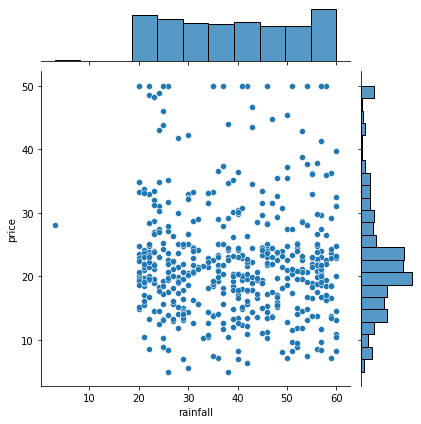

In [5]:
#Scatter Plot
sns.jointplot(x='rainfall',y='price',data=df)

<AxesSubplot:xlabel='airport', ylabel='count'>

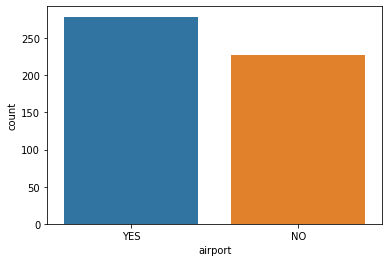

In [6]:
#Graph for categorical variable
sns.countplot(x='airport',data=df)

In [7]:
#Outliers
uv=np.percentile(df.n_hot_rooms,[99])[0]
df[(df.n_hot_rooms>uv)] #Get all rows with n_hot_rooms value greater than 99 percentile

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,bus_ter,parks
2,34.7,0.02729,37.07,0.4690,7.185,61.1,5.03,4.86,5.01,4.97,22.2,4.03,NO,7.394,101.12,None,38,YES,0.045764
166,50.0,2.01019,49.58,0.6050,7.929,96.2,2.11,1.91,2.31,1.86,25.3,3.70,YES,8.300,15.40,River,37,YES,0.052105
204,50.0,0.02009,32.68,0.4161,8.034,31.9,5.41,4.80,5.28,4.99,25.3,2.88,YES,8.900,15.40,River,51,YES,0.044178
267,50.0,0.57834,33.97,0.5750,8.297,67.0,2.60,2.13,2.43,2.52,27.0,7.44,YES,8.000,15.40,None,42,YES,0.063235
369,50.0,5.66998,48.10,0.6310,6.683,96.8,1.55,1.28,1.65,0.94,19.8,3.73,YES,6.700,15.40,River,58,YES,0.067477
423,13.4,7.05042,48.10,0.6140,6.103,85.1,2.08,1.80,2.34,1.87,19.8,23.29,NO,8.268,81.12,Lake,29,YES,0.063344


In [8]:
#Capping And Flooring
df.n_hot_rooms[(df.n_hot_rooms> 3*uv)]= 3*uv

<ipython-input-8-74b97026b0c1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.n_hot_rooms[(df.n_hot_rooms> 3*uv)]= 3*uv


In [9]:
lv=np.percentile(df.rainfall,[1])[0]
df[(df.rainfall <lv)]

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,bus_ter,parks
213,28.1,0.14052,40.59,0.489,6.375,32.3,4.11,3.92,4.18,3.57,21.4,9.38,YES,7.562,10.2248,None,3,YES,0.044019


In [10]:
df.rainfall[(df.rainfall < 0.3*lv)] = 0.3*lv

<ipython-input-10-0dd828a01160>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rainfall[(df.rainfall < 0.3*lv)] = 0.3*lv


In [11]:
df.describe()

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,parks
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,498.000000,506.000000,506.000000,506.000000
mean,22.528854,3.613524,41.136779,0.554695,6.284634,68.574901,3.971996,3.628775,3.960672,3.618972,21.544466,12.653063,7.899767,12.864050,39.187747,0.054454
std,9.182176,8.601545,6.860353,0.115878,0.702617,28.148861,2.108532,2.108580,2.119797,2.099203,2.164946,7.141062,1.476683,2.688778,12.497221,0.010632
min,5.000000,0.006320,30.460000,0.385000,3.561000,2.900000,1.130000,0.920000,1.150000,0.730000,18.000000,1.730000,5.268000,10.057600,6.000000,0.033292
25%,17.025000,0.082045,35.190000,0.449000,5.885500,45.025000,2.270000,1.940000,2.232500,1.940000,19.800000,6.950000,6.634500,11.189800,28.000000,0.046464
50%,21.200000,0.256510,39.690000,0.538000,6.208500,77.500000,3.385000,3.010000,3.375000,3.070000,20.950000,11.360000,7.999000,12.720000,39.000000,0.053507
75%,25.000000,3.677083,48.100000,0.624000,6.623500,94.075000,5.367500,4.992500,5.407500,4.985000,22.600000,16.955000,9.088000,14.170800,50.000000,0.061397
max,50.000000,88.976200,57.740000,0.871000,8.780000,100.000000,12.320000,11.930000,12.320000,11.940000,27.400000,37.970000,10.876000,46.198560,60.000000,0.086711


In [12]:
#Missing Value Imputation
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        506 non-null    float64
 1   crime_rate   506 non-null    float64
 2   resid_area   506 non-null    float64
 3   air_qual     506 non-null    float64
 4   room_num     506 non-null    float64
 5   age          506 non-null    float64
 6   dist1        506 non-null    float64
 7   dist2        506 non-null    float64
 8   dist3        506 non-null    float64
 9   dist4        506 non-null    float64
 10  teachers     506 non-null    float64
 11  poor_prop    506 non-null    float64
 12  airport      506 non-null    object 
 13  n_hos_beds   498 non-null    float64
 14  n_hot_rooms  506 non-null    float64
 15  waterbody    506 non-null    object 
 16  rainfall     506 non-null    int64  
 17  bus_ter      506 non-null    object 
 18  parks        506 non-null    float64
dtypes: float

In [13]:
df=df.fillna(df.mean())

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        506 non-null    float64
 1   crime_rate   506 non-null    float64
 2   resid_area   506 non-null    float64
 3   air_qual     506 non-null    float64
 4   room_num     506 non-null    float64
 5   age          506 non-null    float64
 6   dist1        506 non-null    float64
 7   dist2        506 non-null    float64
 8   dist3        506 non-null    float64
 9   dist4        506 non-null    float64
 10  teachers     506 non-null    float64
 11  poor_prop    506 non-null    float64
 12  airport      506 non-null    object 
 13  n_hos_beds   506 non-null    float64
 14  n_hot_rooms  506 non-null    float64
 15  waterbody    506 non-null    object 
 16  rainfall     506 non-null    int64  
 17  bus_ter      506 non-null    object 
 18  parks        506 non-null    float64
dtypes: float

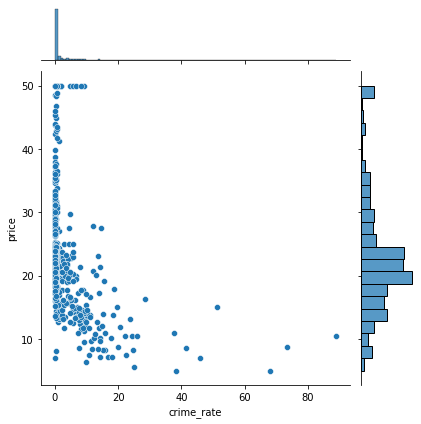

In [15]:
sns.jointplot(x='crime_rate',y='price',data=df)

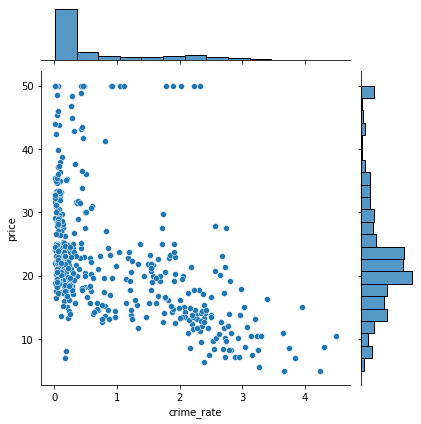

In [16]:
#Transformimg Variable
df.crime_rate=np.log(1+df.crime_rate)
sns.jointplot(x='crime_rate',y='price',data=df)

In [17]:
#Creating new variable
df['avg_dist']=(df.dist1+df.dist2+df.dist3+df.dist4)
df.describe()

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,parks,avg_dist
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,22.528854,0.813418,41.136779,0.554695,6.284634,68.574901,3.971996,3.628775,3.960672,3.618972,21.544466,12.653063,7.899767,12.864050,39.187747,0.054454,15.180415
std,9.182176,1.022731,6.860353,0.115878,0.702617,28.148861,2.108532,2.108580,2.119797,2.099203,2.164946,7.141062,1.464939,2.688778,12.497221,0.010632,8.423435
min,5.000000,0.006300,30.460000,0.385000,3.561000,2.900000,1.130000,0.920000,1.150000,0.730000,18.000000,1.730000,5.268000,10.057600,6.000000,0.033292,4.510000
25%,17.025000,0.078853,35.190000,0.449000,5.885500,45.025000,2.270000,1.940000,2.232500,1.940000,19.800000,6.950000,6.659000,11.189800,28.000000,0.046464,8.402500
50%,21.200000,0.228336,39.690000,0.538000,6.208500,77.500000,3.385000,3.010000,3.375000,3.070000,20.950000,11.360000,7.963000,12.720000,39.000000,0.053507,12.830000
75%,25.000000,1.542674,48.100000,0.624000,6.623500,94.075000,5.367500,4.992500,5.407500,4.985000,22.600000,16.955000,9.076000,14.170800,50.000000,0.061397,20.750000
max,50.000000,4.499545,57.740000,0.871000,8.780000,100.000000,12.320000,11.930000,12.320000,11.940000,27.400000,37.970000,10.876000,46.198560,60.000000,0.086711,48.510000


In [18]:
#Deleting Columns
del df['dist1']
del df['dist2']
del df['dist3']
del df['dist4']
df.describe()

,price,crime_rate,resid_area,air_qual,room_num,age,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,parks,avg_dist
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,22.528854,0.813418,41.136779,0.554695,6.284634,68.574901,21.544466,12.653063,7.899767,12.864050,39.187747,0.054454,15.180415
std,9.182176,1.022731,6.860353,0.115878,0.702617,28.148861,2.164946,7.141062,1.464939,2.688778,12.497221,0.010632,8.423435
min,5.000000,0.006300,30.460000,0.385000,3.561000,2.900000,18.000000,1.730000,5.268000,10.057600,6.000000,0.033292,4.510000
25%,17.025000,0.078853,35.190000,0.449000,5.885500,45.025000,19.800000,6.950000,6.659000,11.189800,28.000000,0.046464,8.402500
50%,21.200000,0.228336,39.690000,0.538000,6.208500,77.500000,20.950000,11.360000,7.963000,12.720000,39.000000,0.053507,12.830000
75%,25.000000,1.542674,48.100000,0.624000,6.623500,94.075000,22.600000,16.955000,9.076000,14.170800,50.000000,0.061397,20.750000
max,50.000000,4.499545,57.740000,0.871000,8.780000,100.000000,27.400000,37.970000,10.876000,46.198560,60.000000,0.086711,48.510000


In [19]:
#Dummy Variable Creation ->To use for regression problems
df=pd.get_dummies(df)
df.head()

,price,crime_rate,resid_area,air_qual,room_num,age,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,parks,avg_dist,airport_NO,airport_YES,waterbody_Lake,waterbody_Lake and River,waterbody_None,waterbody_River,bus_ter_YES
0,24.0,0.006300,32.31,0.538,6.575,65.2,24.7,4.98,5.480,11.19200,23,0.049347,16.35,0,1,0,0,0,1,1
1,21.6,0.026944,37.07,0.469,6.421,78.9,22.2,9.14,7.332,12.17280,42,0.046146,19.87,1,0,1,0,0,0,1
2,34.7,0.026924,37.07,0.469,7.185,61.1,22.2,4.03,7.394,46.19856,38,0.045764,19.87,1,0,0,0,1,0,1
3,33.4,0.031857,32.18,0.458,6.998,45.8,21.3,2.94,9.268,11.26720,45,0.047151,24.26,0,1,1,0,0,0,1
4,36.2,0.066770,32.18,0.458,7.147,54.2,21.3,5.33,8.824,11.28960,55,0.039474,24.25,1,0,1,0,0,0,1


In [20]:
del df['airport_NO']
del df['waterbody_None']
df.head()

,price,crime_rate,resid_area,air_qual,room_num,age,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,parks,avg_dist,airport_YES,waterbody_Lake,waterbody_Lake and River,waterbody_River,bus_ter_YES
0,24.0,0.006300,32.31,0.538,6.575,65.2,24.7,4.98,5.480,11.19200,23,0.049347,16.35,1,0,0,1,1
1,21.6,0.026944,37.07,0.469,6.421,78.9,22.2,9.14,7.332,12.17280,42,0.046146,19.87,0,1,0,0,1
2,34.7,0.026924,37.07,0.469,7.185,61.1,22.2,4.03,7.394,46.19856,38,0.045764,19.87,0,0,0,0,1
3,33.4,0.031857,32.18,0.458,6.998,45.8,21.3,2.94,9.268,11.26720,45,0.047151,24.26,1,1,0,0,1
4,36.2,0.066770,32.18,0.458,7.147,54.2,21.3,5.33,8.824,11.28960,55,0.039474,24.25,0,1,0,0,1


In [21]:
#Correlation Matrix
df.corr()

,price,crime_rate,resid_area,air_qual,room_num,age,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,parks,avg_dist,airport_YES,waterbody_Lake,waterbody_Lake and River,waterbody_River,bus_ter_YES
price,1.000000,-0.466527,-0.484754,-0.429300,0.696304,-0.377999,0.505655,-0.740836,0.108880,0.017007,-0.047200,-0.391574,0.249289,0.182867,0.036233,-0.037497,0.071751,NaN
crime_rate,-0.466527,1.000000,0.660283,0.707587,-0.288784,0.559591,-0.390052,0.608970,-0.004089,0.056570,0.082151,0.638951,-0.586371,-0.134486,-0.025390,0.009076,-0.060099,NaN
resid_area,-0.484754,0.660283,1.000000,0.763651,-0.391676,0.644779,-0.383248,0.603800,0.005799,-0.003761,0.055845,0.707635,-0.708022,-0.115401,-0.026590,0.051649,-0.098976,NaN
air_qual,-0.429300,0.707587,0.763651,1.000000,-0.302188,0.731470,-0.188933,0.590879,-0.049553,0.007238,0.091956,0.915544,-0.769247,-0.073903,-0.046393,0.013849,-0.037772,NaN
room_num,0.696304,-0.288784,-0.391676,-0.302188,1.000000,-0.240265,0.355501,-0.613808,0.032009,0.014583,-0.064718,-0.282817,0.205241,0.163774,-0.004195,0.010554,0.046251,NaN
age,-0.377999,0.559591,0.644779,0.731470,-0.240265,1.000000,-0.261515,0.602339,-0.021012,0.013918,0.074684,0.673850,-0.747906,0.005101,0.003452,-0.004354,-0.088609,NaN
teachers,0.505655,-0.390052,-0.383248,-0.188933,0.355501,-0.261515,1.000000,-0.374044,-0.008056,-0.037007,-0.045928,-0.187004,0.232452,0.069437,0.048717,-0.046981,0.094256,NaN
poor_prop,-0.740836,0.608970,0.603800,0.590879,-0.613808,0.602339,-0.374044,1.000000,-0.066008,0.017036,0.061444,0.552310,-0.496967,-0.095054,0.003197,0.020620,-0.109004,NaN
n_hos_beds,0.108880,-0.004089,0.005799,-0.049553,0.032009,-0.021012,-0.008056,-0.066008,1.000000,-0.003130,0.058596,-0.071272,-0.027871,-0.006365,0.042278,0.059482,-0.074148,NaN
n_hot_rooms,0.017007,0.056570,-0.003761,0.007238,0.014583,0.013918,-0.037007,0.017036,-0.003130,1.000000,0.014869,0.023757,-0.020700,-0.055338,0.037925,0.014755,-0.064096,NaN


# Linear-Regression

In [22]:
x=sn.add_constant(df['room_num']) #To add constant (beta)0
lm=sn.OLS(df['price'],x).fit() #Creating model object->OLS:Ordinary Least Square
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.485
Model:                            OLS   Adj. R-squared:                  0.484
Method:                 Least Squares   F-statistic:                     474.3
Date:                Sat, 22 May 2021   Prob (F-statistic):           1.31e-74
Time:                        15:42:25   Log-Likelihood:                -1671.6
No. Observations:                 506   AIC:                             3347.
Df Residuals:                     504   BIC:                             3356.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -34.6592      2.642    -13.118      0.000     -39.850     -29.468
room_num       9.0997      0.418     21.779      0.000       8.279       9.921
==============================================================================
Omnibus:                      103.753   Durbin-Watson:                   0.681
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              633.429
Skew:                           0.729   Prob(JB):                    2.84e-138
Kurtosis:                       8.284   Cond. No.                         58.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
#Method-2 for Linear Regression
from sklearn.linear_model import LinearRegression

In [30]:
y= df['price']
x= df[['room_num']] #To make it 2D we add 2 sets of brackets
lm2= LinearRegression()
lm2.fit(x,y)
print(lm2.intercept_,lm2.coef_)

-34.659243123097184 [9.09966966]


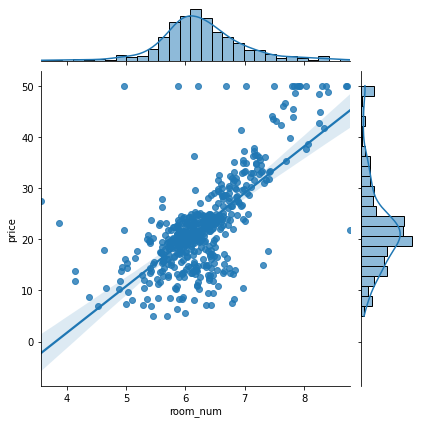

In [26]:
sns.jointplot(x= df['room_num'], y=df['price'], data=df ,kind='reg') #By default kind is scatter

# Multiple-Regression

In [32]:
x_multi =df.drop('price',axis=1) #We want all columns(1) except 'price' therefore using 'drop'
x_multi.head()

,crime_rate,resid_area,air_qual,room_num,age,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,parks,avg_dist,airport_YES,waterbody_Lake,waterbody_Lake and River,waterbody_River,bus_ter_YES
0,0.006300,32.31,0.538,6.575,65.2,24.7,4.98,5.480,11.19200,23,0.049347,16.35,1,0,0,1,1
1,0.026944,37.07,0.469,6.421,78.9,22.2,9.14,7.332,12.17280,42,0.046146,19.87,0,1,0,0,1
2,0.026924,37.07,0.469,7.185,61.1,22.2,4.03,7.394,46.19856,38,0.045764,19.87,0,0,0,0,1
3,0.031857,32.18,0.458,6.998,45.8,21.3,2.94,9.268,11.26720,45,0.047151,24.26,1,1,0,0,1
4,0.066770,32.18,0.458,7.147,54.2,21.3,5.33,8.824,11.28960,55,0.039474,24.25,0,1,0,0,1


In [33]:
y_multi=df['price']
y_multi.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: price, dtype: float64

In [36]:
x_multi_cons= sn.add_constant(x_multi)

In [37]:
x_multi_cons.head()

,crime_rate,resid_area,air_qual,room_num,age,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,parks,avg_dist,airport_YES,waterbody_Lake,waterbody_Lake and River,waterbody_River,bus_ter_YES
0,0.006300,32.31,0.538,6.575,65.2,24.7,4.98,5.480,11.19200,23,0.049347,16.35,1,0,0,1,1
1,0.026944,37.07,0.469,6.421,78.9,22.2,9.14,7.332,12.17280,42,0.046146,19.87,0,1,0,0,1
2,0.026924,37.07,0.469,7.185,61.1,22.2,4.03,7.394,46.19856,38,0.045764,19.87,0,0,0,0,1
3,0.031857,32.18,0.458,6.998,45.8,21.3,2.94,9.268,11.26720,45,0.047151,24.26,1,1,0,0,1
4,0.066770,32.18,0.458,7.147,54.2,21.3,5.33,8.824,11.28960,55,0.039474,24.25,0,1,0,0,1


In [38]:
lm_multi = sn.OLS(y_multi,x_multi_cons).fit()
lm_multi.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.722
Model:                            OLS   Adj. R-squared:                  0.712
Method:                 Least Squares   F-statistic:                     79.20
Date:                Sat, 22 May 2021   Prob (F-statistic):          2.05e-124
Time:                        16:14:57   Log-Likelihood:                -1515.9
No. Observations:                 506   AIC:                             3066.
Df Residuals:                     489   BIC:                             3138.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
crime_rate                   0.0319      0.349      0.091      0.927      -0.653       0.717
resid_area                  -0.0427      0.058     -0.741      0.459      -0.156       0.070
air_qual                   -20.8547      5.895     -3.538      0.000     -32.437      -9.272
room_num                     4.0128      0.427      9.409      0.000       3.175       4.851
age                         -0.0055      0.014     -0.405      0.686      -0.032       0.021
teachers                     1.0117      0.122      8.284      0.000       0.772       1.252
poor_prop                   -0.5791      0.053    -10.989      0.000      -0.683      -0.476
n_hos_beds                   0.3404      0.153      2.232      0.026       0.041       0.640
n_hot_rooms                  0.0876      0.082      1.066      0.287      -0.074       0.249
rainfall                     0.0163      0.018      0.915      0.361      -0.019       0.051
parks                       59.1167     51.608      1.146      0.253     -42.283     160.517
avg_dist                    -0.3042      0.047     -6.441      0.000      -0.397      -0.211
airport_YES                  1.1121      0.454      2.447      0.015       0.219       2.005
waterbody_Lake               0.2594      0.642      0.404      0.686      -1.002       1.520
waterbody_Lake and River    -0.6841      0.714     -0.958      0.338      -2.087       0.718
waterbody_River             -0.2752      0.547     -0.503      0.615      -1.349       0.799
bus_ter_YES                 -7.0084      5.281     -1.327      0.185     -17.385       3.368
==============================================================================
Omnibus:                      179.224   Durbin-Watson:                   0.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              796.825
Skew:                           1.528   Prob(JB):                    9.37e-174
Kurtosis:                       8.334   Cond. No.                     2.32e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.32e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [39]:
lm3=LinearRegression()
lm3.fit(x_multi,y_multi)
print(lm3.intercept_,lm3.coef_)

-7.0084336595585945 [ 3.18711520e-02 -4.26679062e-02 -2.08546844e+01  4.01281976e+00
 -5.51042760e-03  1.01168089e+00 -5.79134299e-01  3.40432813e-01
  8.76278098e-02  1.63090790e-02  5.91167254e+01 -3.04155226e-01
  1.11207644e+00  2.59412451e-01 -6.84079711e-01 -2.75176945e-01
  0.00000000e+00]


# Test-Train Split

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
x_train,x_test,y_train,y_test = train_test_split(x_multi,y_multi, test_size=0.2,random_state=0) #Random_State to get same train,test set everytime
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(404, 17) (102, 17) (404,) (102,)


In [42]:
lm_a=LinearRegression()
lm_a.fit(x_train,y_train)

LinearRegression()

In [45]:
from sklearn.metrics import r2_score
y_test_a=lm_a.predict(x_test)
y_train_a=lm_a.predict(x_train)

In [46]:
print(r2_score(y_test,y_test_a))
print(r2_score(y_train,y_train_a))

0.5479196494258671
0.7576602212832155
